In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pylab as pl
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150

df_mat = pd.read_csv('student/student-mat.csv', delimiter = ';')

'''
first things first ;)
let's get familiar with the dataset
a couple of modules from our 
pandas library can assist with that :/
'''

df_mat.describe(include = "all").T   #lets put it in a table rather, well I find it more neat


count unique     top freq      mean       std  min  25%  50%  75%  \
school       395      2      GP  349       NaN       NaN  NaN  NaN  NaN  NaN   
sex          395      2       F  208       NaN       NaN  NaN  NaN  NaN  NaN   
age          395    NaN     NaN  NaN   16.6962   1.27604   15   16   17   18   
address      395      2       U  307       NaN       NaN  NaN  NaN  NaN  NaN   
famsize      395      2     GT3  281       NaN       NaN  NaN  NaN  NaN  NaN   
Pstatus      395      2       T  354       NaN       NaN  NaN  NaN  NaN  NaN   
Medu         395    NaN     NaN  NaN   2.74937   1.09474    0    2    3    4   
Fedu         395    NaN     NaN  NaN   2.52152    1.0882    0    2    2    3   
Mjob         395      5   other  141       NaN       NaN  NaN  NaN  NaN  NaN   
Fjob         395      5   other  217       NaN       NaN  NaN  NaN  NaN  NaN   
reason       395      4  course  145       NaN       NaN  NaN  NaN  NaN  NaN   
guardian     395      3  mother  273       NaN       NaN  NaN  NaN  NaN  NaN   
traveltime   395    NaN     NaN  NaN    1.4481  0.697505    1    1    1    2   
studytime    395    NaN     NaN  NaN   2.03544   0.83924    1    1    2    2   
failures     395    NaN     NaN  NaN  0.334177  0.743651    0    0    0    0   
schoolsup    395      2      no  344       NaN       NaN  NaN  NaN  NaN  NaN   
famsup       395      2     yes  242       NaN       NaN  NaN  NaN  NaN  NaN   
paid         395      2      no  214       NaN       NaN  NaN  NaN  NaN  NaN   
activities   395      2     yes  201       NaN       NaN  NaN  NaN  NaN  NaN   
nursery      395      2     yes  314       NaN       NaN  NaN  NaN  NaN  NaN   
higher       395      2     yes  375       NaN       NaN  NaN  NaN  NaN  NaN   
internet     395      2     yes  329       NaN       NaN  NaN  NaN  NaN  NaN   
romantic     395      2      no  263       NaN       NaN  NaN  NaN  NaN  NaN   
famrel       395    NaN     NaN  NaN    3.9443  0.896659    1    4    4    5   
freetime     395    NaN     NaN  NaN   3.23544  0.998862    1    3    3    4   
goout        395    NaN     NaN  NaN   3.10886   1.11328    1    2    3    4   
Dalc         395    NaN     NaN  NaN   1.48101  0.890741    1    1    1    2   
Walc         395    NaN     NaN  NaN   2.29114    1.2879    1    1    2    3   
health       395    NaN     NaN  NaN   3.55443    1.3903    1    3    4    5   
absences     395    NaN     NaN  NaN   5.70886    8.0031    0    0    4    8   
G1           395    NaN     NaN  NaN   10.9089   3.31919    3    8   11   13   
G2           395    NaN     NaN  NaN   10.7139    3.7615    0    9   11   13   
G3           395    NaN     NaN  NaN   10.4152   4.58144    0    8   11   14   

            max  
school      NaN  
sex         NaN  
age          22  
address     NaN  
famsize     NaN  
Pstatus     NaN  
Medu          4  
Fedu          4  
Mjob        NaN  
Fjob        NaN  
reason      NaN  
guardian    NaN  
traveltime    4  
studytime     4  
failures      3  
schoolsup   NaN  
famsup      NaN  
paid        NaN  
activities  NaN  
nursery     NaN  
higher      NaN  
internet    NaN  
romantic    NaN  
famrel        5  
freetime      5  
goout         5  
Dalc          5  
Walc          5  
health        5  
absences     75  
G1           19  
G2           19  
G3           20

In [13]:
df_mat.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

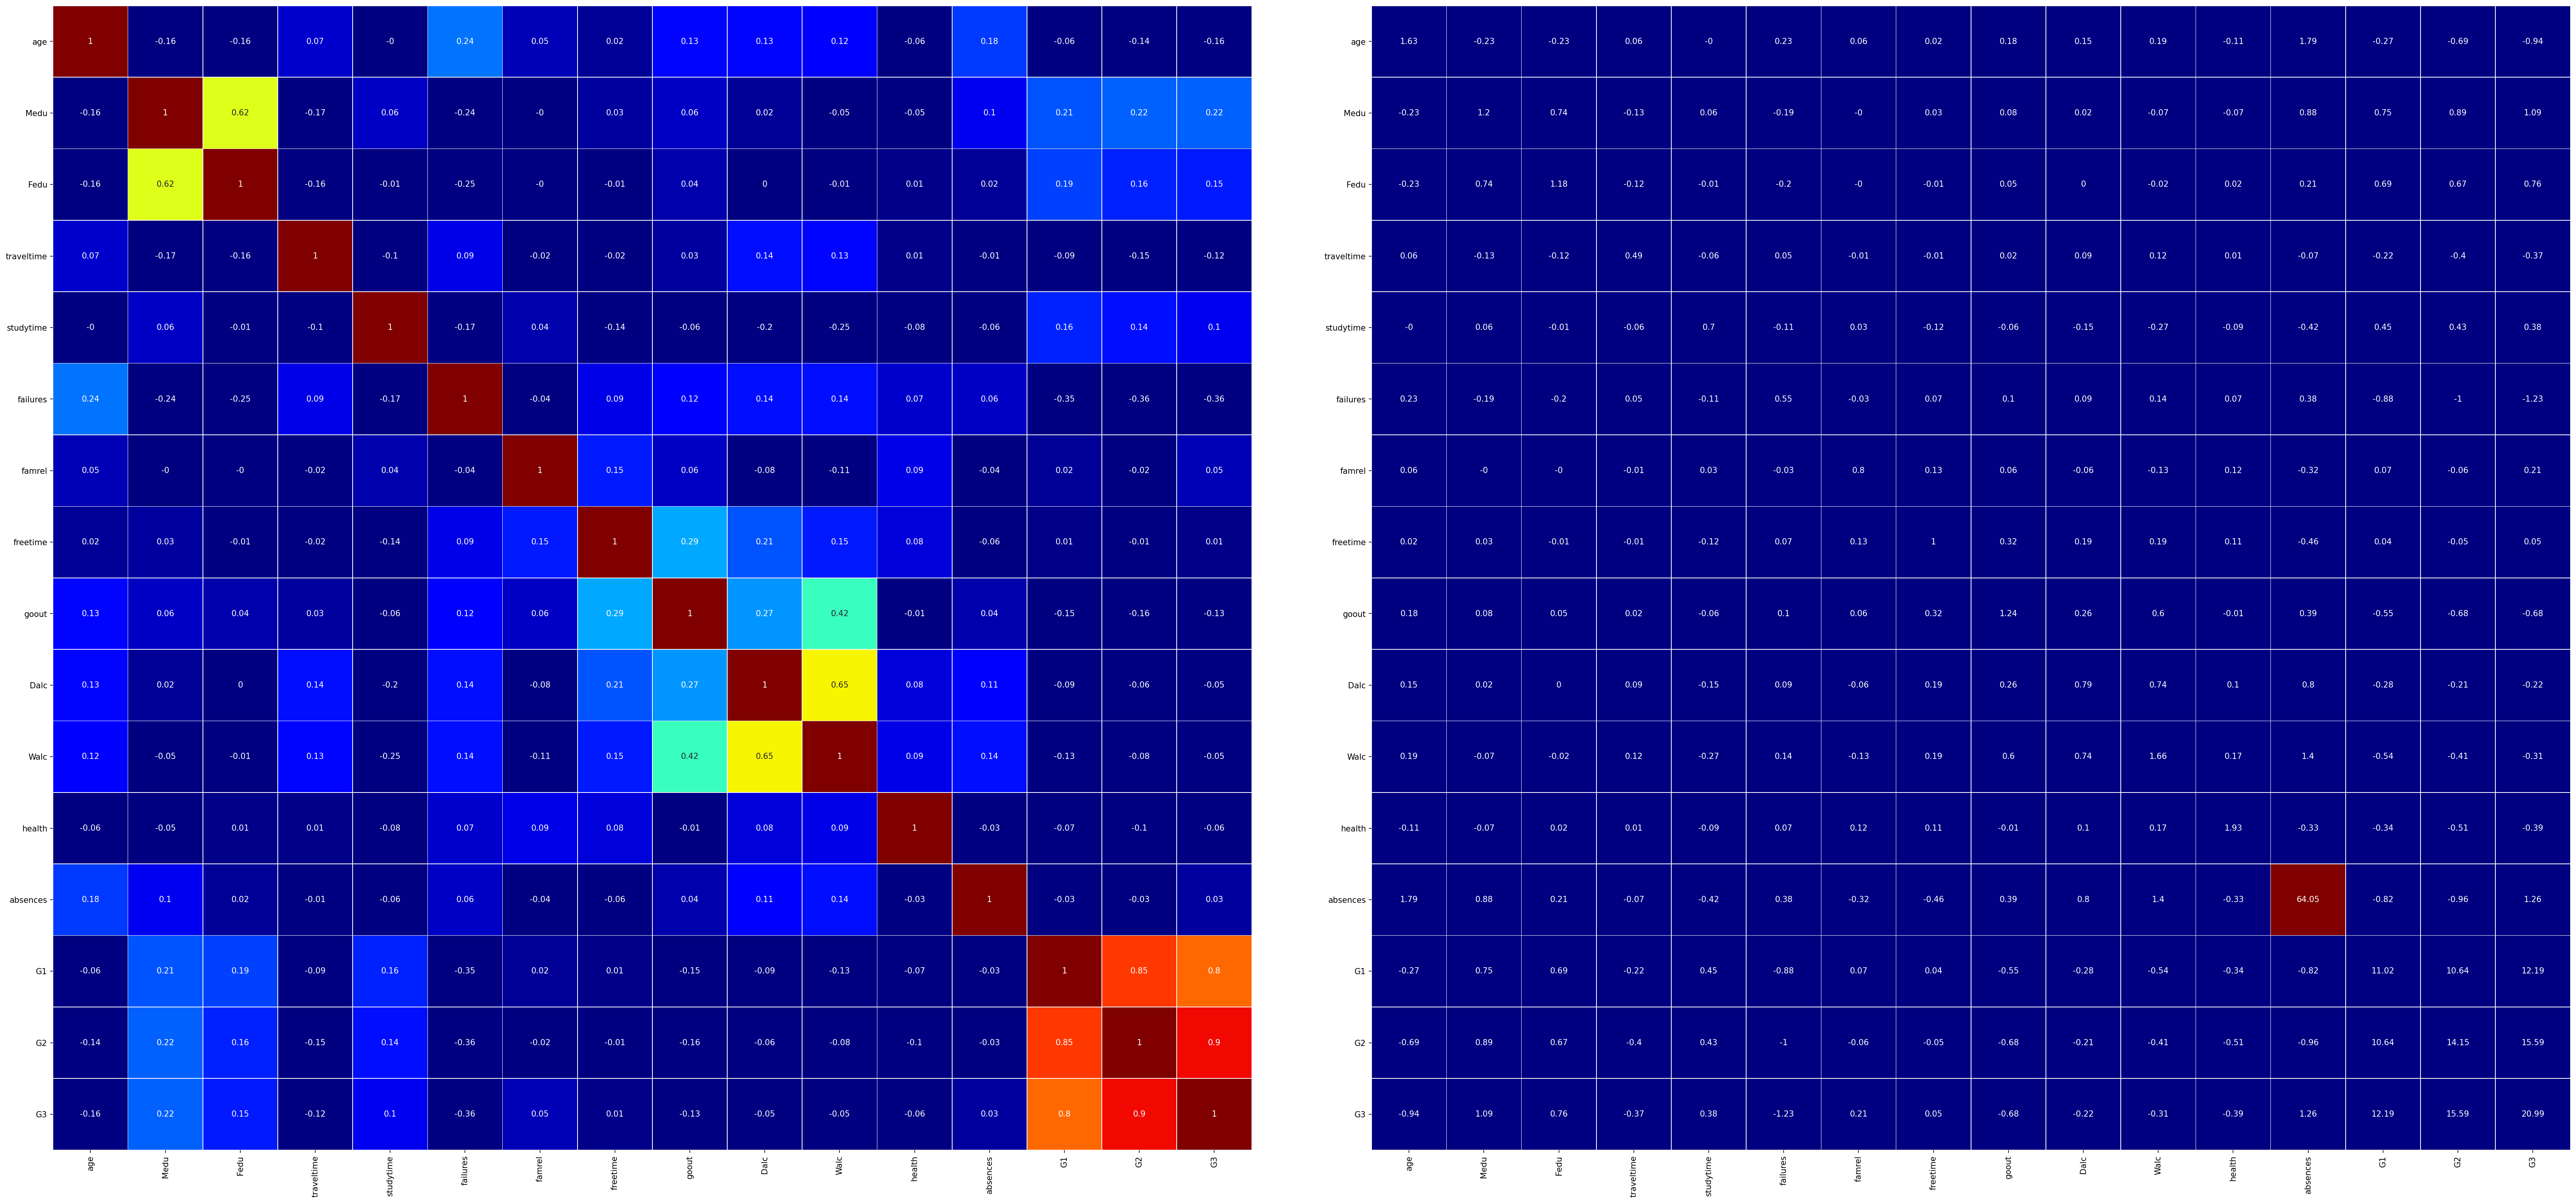

In [14]:
corr_matrix = df_mat.corr()

cov_matrix = pd.DataFrame.cov(df_mat)


pl.figure(figsize = (20, 20))

pl.subplot(221)

sns.heatmap(np.round(corr_matrix, 2), annot = True, linewidths = .3,  cmap = "jet", vmin = 0, cbar = False) 

pl.subplot(222)

sns.heatmap(np.round(cov_matrix, 2), annot = True, fmt = 'g', linewidths = .3, 
            cbar = False, vmin = 30, vmax = 40, cmap = 'jet')


pl.subplots_adjust(right = 2.3, top = 2.3, wspace = .1)
pl.show()



## $\textsf{What do these two giant figures tell us?}$ 

Well, I'll go first. On the left we have our correlation matrix and on the right is the covariance matrix. I'm sure you asked if we really need these to perform regression models? I bet we do if we really want to understand the underlying statistics of our data. What do I even mean by "statistics", well I'm talking your p-values, pearson correlation coefficients, VIF, etc. (You don't know what those are, maybe chat a bit to your google hey (https://www.statology.org/multicollinearity-regression/), I'm also not some God of Stats ;/)

Ok, jokes aside, I hope you didn't take me personal ;)

## $\textsf{1. Correlation matrix}$

   * Correlation matrix helps us get a feel of how dependent our variables are. So, essentially, it tells us the linear relationship between two random variables.
   
   <br>
   
   * Why do we really care? Remember the story of "multicollinearity"? Trust me I'm not trying to be fancy or anything but multicollinearity is just another fancy term for strong dependence on two predictor variables which becomes a problem when fitting and analysing your regression model. 
   
      <br>

   
   * At the end of your classifying run I guess you do want to know which predictor variables really have an effect on the class-variable (or the target variable). This is why we would strive to know the linear realtionship between our predictor variables even before we start to apply our regression model. If I'm honest with you, multicollinearity has no effect on the performance of your model, but might give not so accurate results when interpreting the results of your 'so called' machine learning regression model.
 
   <br>
   
   * Now, how do we interpret the correlation matrix. First of all, correlation coeffecients are values in between -1 and 1. coeff = -1 shows evidence of a strong of a negative linear correlation, coeff = 0 shows no linear correlation and coeff = 1 shows strong evidence of positive linear correlation. By negative and positive linnear correlations I'm sure you already know what I'm trying to mean ;). Negative linear correlation means that an increase in one variable leads to a decrease on the next one. And yup, positive linear correlation is just the way you thought of it ;). 
   
   <br>
   
   * But maybe your question is how does one know the cutt-off of the correlation coefficient, well that's my question to you also ;). Just to be safe, for my case I'd try to select all the values that are weakly correlated, mhhh, maybe coeffs between -0.3 and 0.3, I'm just trying to stay close to zero really (but if you have time, just like me, you can play around with different cutt-off points and see if your model makes physical sense).
   
   

## $\textsf{2. Covariance matrix}$

   * Guess what? It's a correlation matrix that's wearing non-standardized mask ;).
   
   <br>
   
   * What I'm trying to imply here is that, it has the same meaning as the correlation matrix but the coefficients are not bound between - 1 and 1. That's all I have to say about the 'mighty' covariance matrix (constructive criticism is allowed ;/)

## $\textsf{Okay, maybe it's time we write some code now}$


In [15]:
'''
removing  all strongly correlated 
variables. i'm just avoiding 
multicollinearity
'''

correlated_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            if colname != 'G3':               #G3 is our target so we can't remove him ;
                correlated_features.append(colname)
            
df_mat.drop(correlated_features, axis = 1, inplace = True)

df_mat.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  romantic famrel  freetime  goout  Dalc Walc health absences  G1  G3  
0       no      4         3      4     1    1      3        6   5   6  
1       no      5         3      3     1    1      3        4   5   6  
2       no      4         3      2     2    3      3       10   7  10  
3      yes      3         2      2     1    1      5        2  15  15  
4       no      4         3      2     1    2      5        4   6  10  

[5 rows x 32 columns]

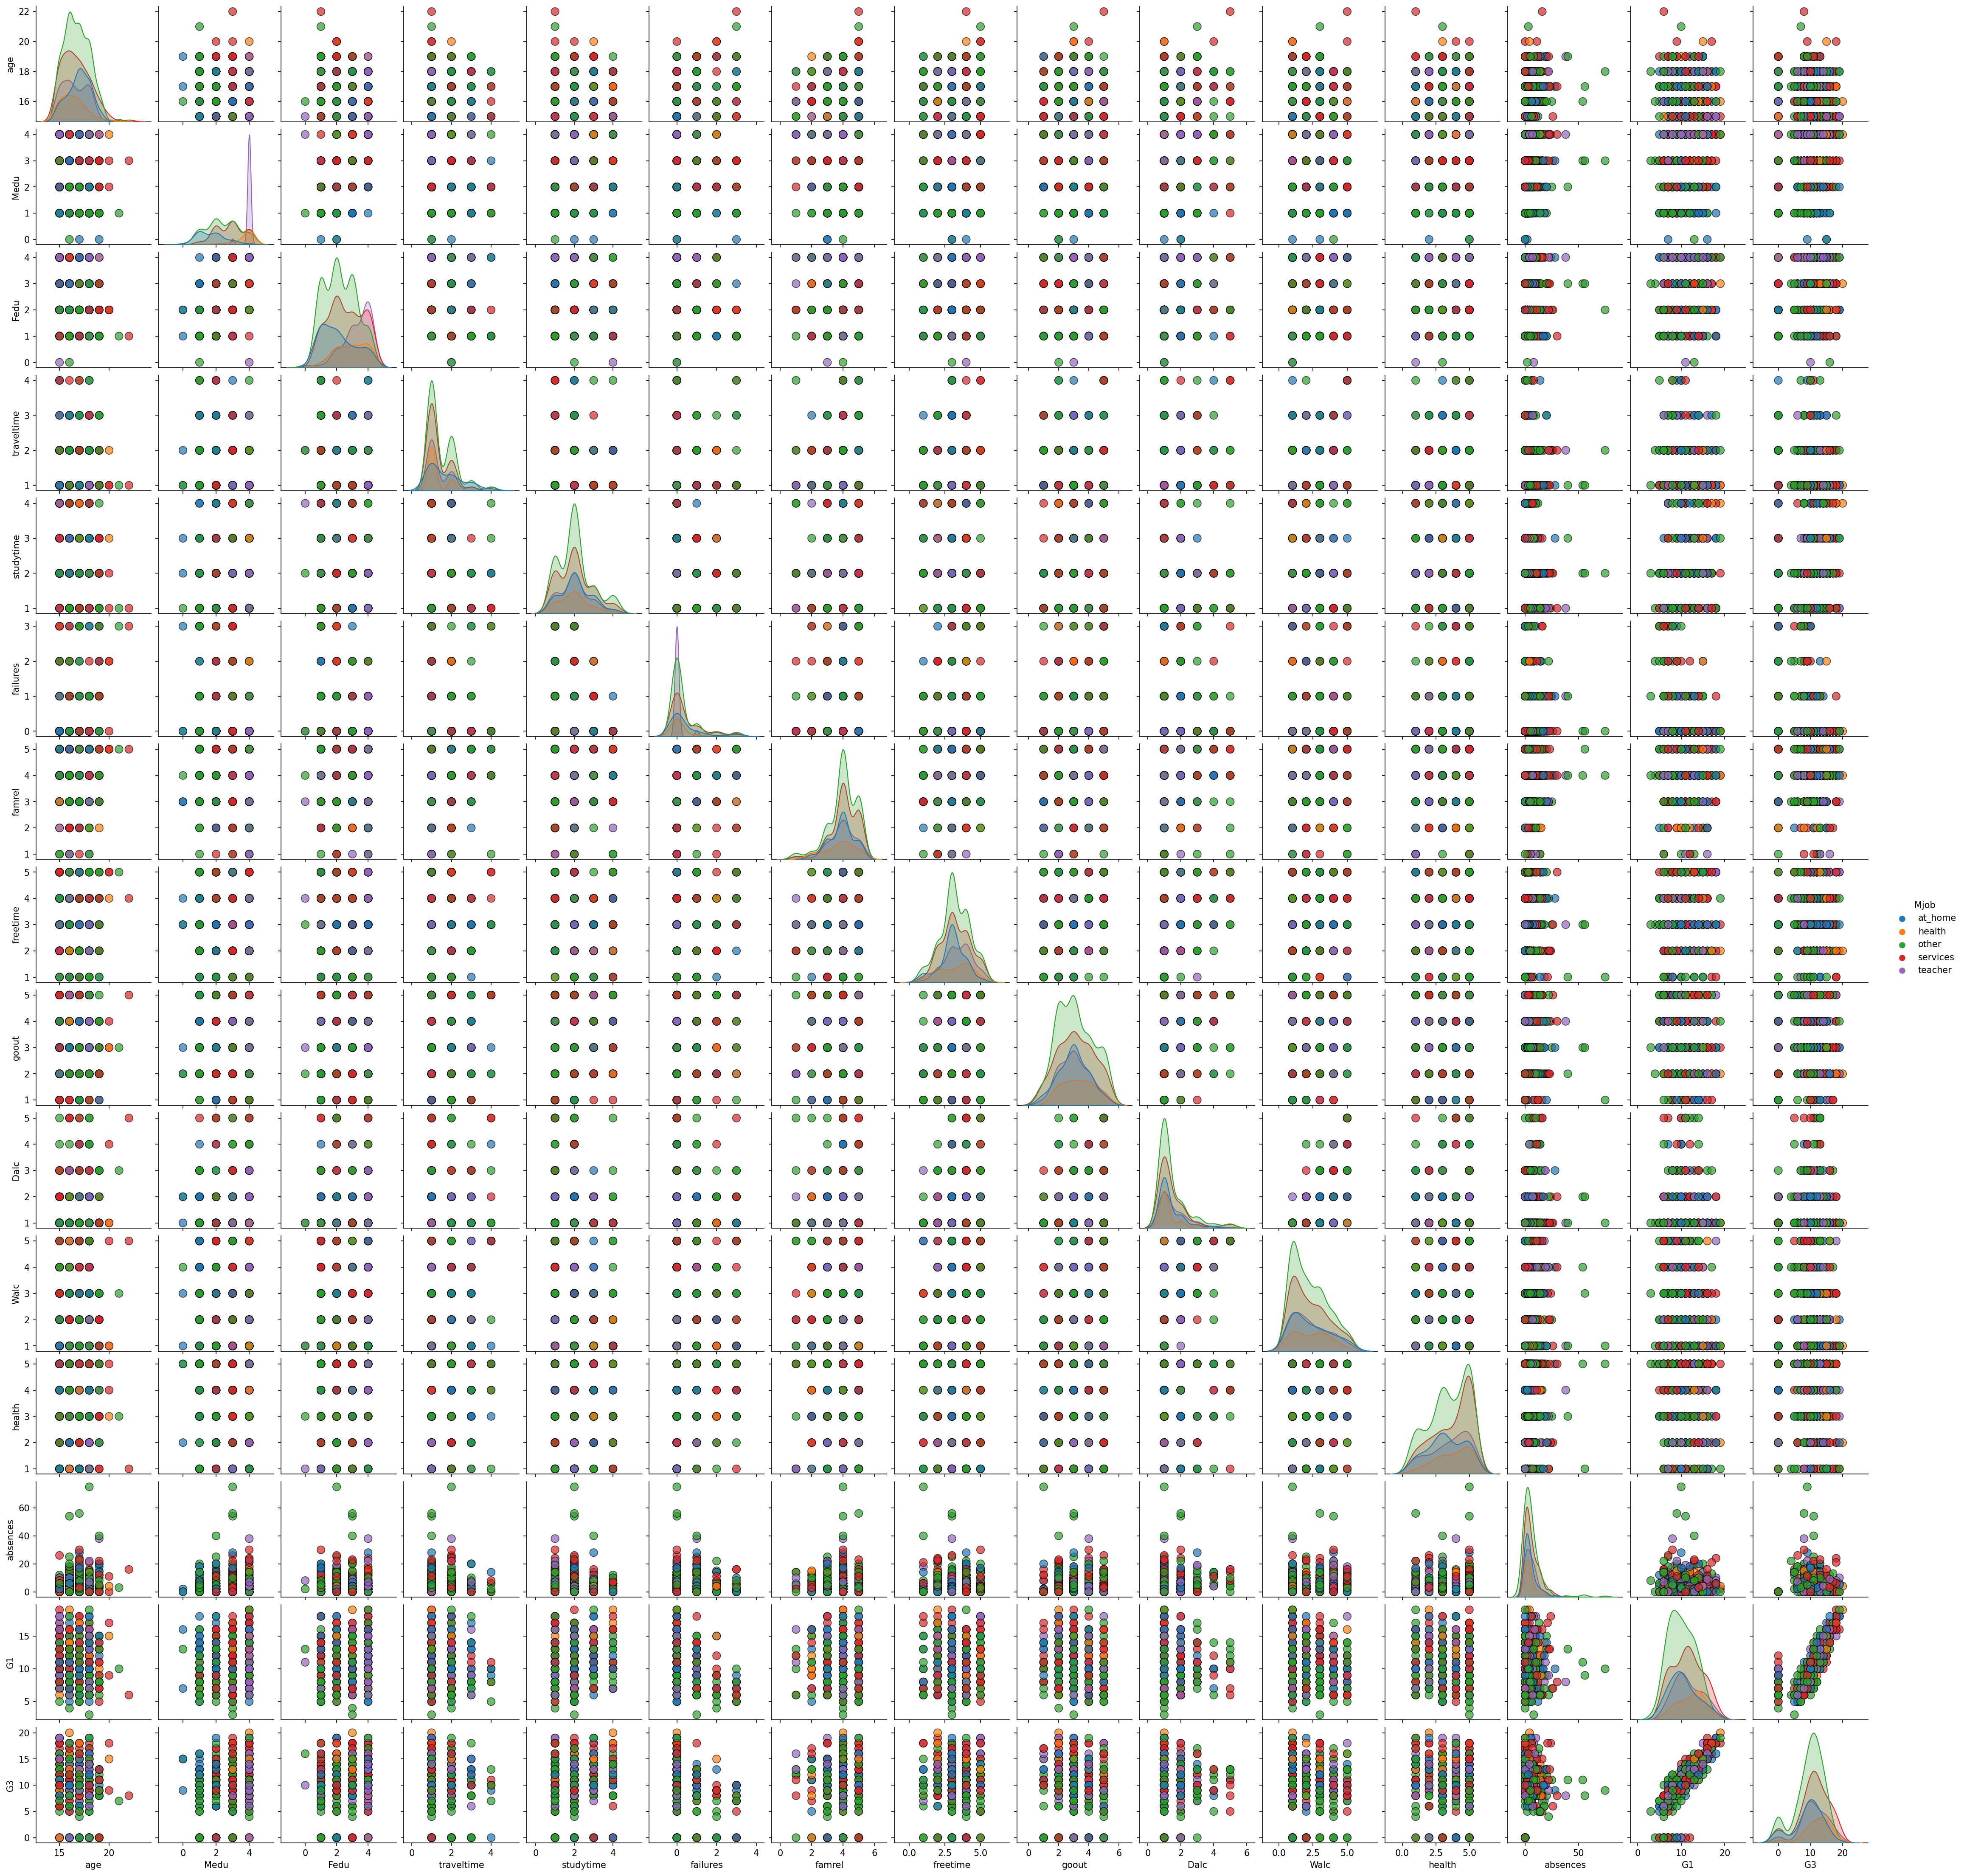

In [16]:
sns.pairplot(df_mat, hue = 'Mjob', diag_kind = 'kde', plot_kws = {'alpha': 0.7, 's': 80, 'edgecolor': 'k'},
             height = 2)
pl.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

'''
dealing with categorical
variables
'''

number = LabelEncoder()
objects = [x for x in df_mat.columns if df_mat[x].dtype == object]

for i in range(len(objects)):
    #if df_mat[objects[i]].value_counts().shape[0] == 2:
    df_mat[objects[i]] = number.fit_transform(df_mat[objects[i]].astype('str')) #encoding categorical variables
    #else:
        #df_mat_copy = pd.get_dummies(df_mat_copy, columns = objects[i], prefix = objects[i])

df_mat.head()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G3  
0         0       4         3      4     1     1       3         6   5   6  
1         0       5         3      3     1     1       3         4   5   6  
2         0       4         3      2     2     3       3        10   7  10  
3         1       3         2      2     1     1       5         2  15  15  
4         0       4         3      2     1     2       5         4   6  10  

[5 rows x 32 columns]

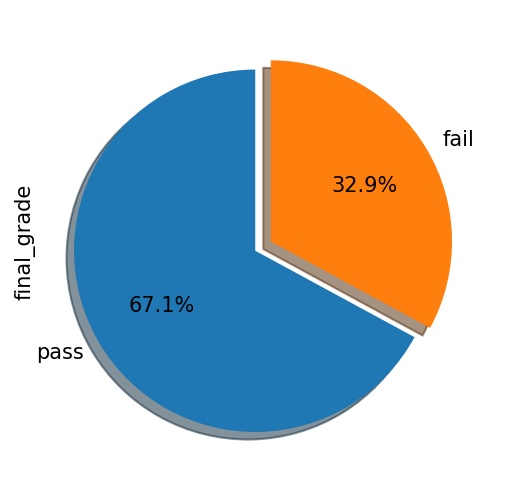

In [18]:
target = df_mat["G3"]

X = df_mat.drop('G3', axis = 1)

missing_data = df_mat.isnull()

missing_data.any()  #looks good hehe

X_copy = X.copy()

X_copy['final_grade'] = 1
X_copy['final_grade'][target < 10] = 0

X_copy.head()

X_copy.final_grade.value_counts().plot(kind = 'pie',figsize = (4, 4), autopct = '%1.1f%%', 
startangle = 90, shadow = True, labels = ['pass', 'fail'], explode = [0.1, 0])

pl.show()

In [19]:
y = X_copy.final_grade

X_copy = X_copy.drop('final_grade', axis = 1)


In [28]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn import tree
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn import svm
from sklearn.metrics import r2_score, accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size = 0.15, random_state = 100)


'''
making pipelines so I can
just assemble all the 
necessary steps in one thing ;)
'''

decision_tree = Pipeline(steps = [('preprocessor', preprocessing.StandardScaler()), 
                    ('tree', tree.DecisionTreeClassifier())])

random_forest = Pipeline(steps = [('preprocessor', preprocessing.StandardScaler()),
                     ('forest', ensemble.RandomForestClassifier())])

svm = Pipeline(steps = [('preprocessor', preprocessing.StandardScaler()), ('svc', svm.SVC())]) 

log_reg = Pipeline(steps = [('preprocessor', preprocessing.StandardScaler()), ('reg', LogisticRegression())])

cg_bayes = Pipeline(steps = [('preprocessor', preprocessing.StandardScaler()), ('naive', CategoricalNB())])


'''
training all three
models
'''

decision_tree.set_params(tree__criterion = 'entropy', tree__max_depth = 5,
                         tree__random_state = 0).fit(X_train, y_train)

random_forest.set_params(forest__n_estimators = 1000, forest__random_state = 0,
                        forest__criterion = 'entropy').fit(X_train, y_train)

'''
i'm aware of the 
degeneracy between the kernel function
and perfomance of model.

beacuse this is a binary classification,
linear was taken for sv classifier
'''

svm.set_params(svc__kernel = 'linear', svc__gamma = .3, 
               svc__C = 0.4, svc__probability = True, svc__decision_function_shape = 'ovo').fit(X_train, y_train)

log_reg.set_params(reg__C = .9).fit(X_train, y_train)

#---------------------------------------------------^(fitting)--------v(predicting)

dec_pred = decision_tree.predict(X_test)

rf_pred = random_forest.predict(X_test)

svm_pred = svm.predict(X_test)

log_reg_pred = log_reg.predict(X_test)


print("accuracy\n-----------------------------")

print('r_forest accuracy:', np.round(100*accuracy_score(rf_pred, y_test), 3),'%')
print('dec_tree accuracy:', np.round(100*accuracy_score(dec_pred, y_test), 3),'%')
print('svm accuracy:', np.round(100*accuracy_score(svm_pred, y_test), 3),'%')
print('logistic regression:', np.round(100*(accuracy_score(y_test, log_reg_pred)), 2), '%\n')

print("MSE\n-----------------------------")

print('forest mse:', np.round(mean_squared_error(rf_pred, y_test), 2))
print('decision mse:', np.round(mean_squared_error(y_test, dec_pred), 2))
print('svm mse:', np.round(mean_squared_error(svm_pred, y_test), 2))
print('logistic regression mse:', np.round(mean_squared_error(log_reg_pred, y_test), 2), '\n')

print("R2_score\n-----------------------------")

print('forest r2_score:', np.round(r2_score(rf_pred, y_test), 2))
print('decision r2_score:', np.round(r2_score(y_test, dec_pred), 2))
print('svm r2_score:', np.round(r2_score(svm_pred, y_test), 2))
print('logistic regression score:', np.round(r2_score(log_reg_pred, y_test), 2))

accuracy
-----------------------------
r_forest accuracy: 90.0 %
dec_tree accuracy: 90.0 %
svm accuracy: 91.667 %
logistic regression: 91.67 %

MSE
-----------------------------
forest mse: 0.1
decision mse: 0.1
svm mse: 0.08
logistic regression mse: 0.08 

R2_score
-----------------------------
forest r2_score: 0.52
decision r2_score: 0.49
svm r2_score: 0.61
logistic regression score: 0.59


area under curve
-----------------------------
dec_tree auc: 0.938
r_forest auc: 0.966
svm_auc: 0.974
log_reg_auc: 0.977


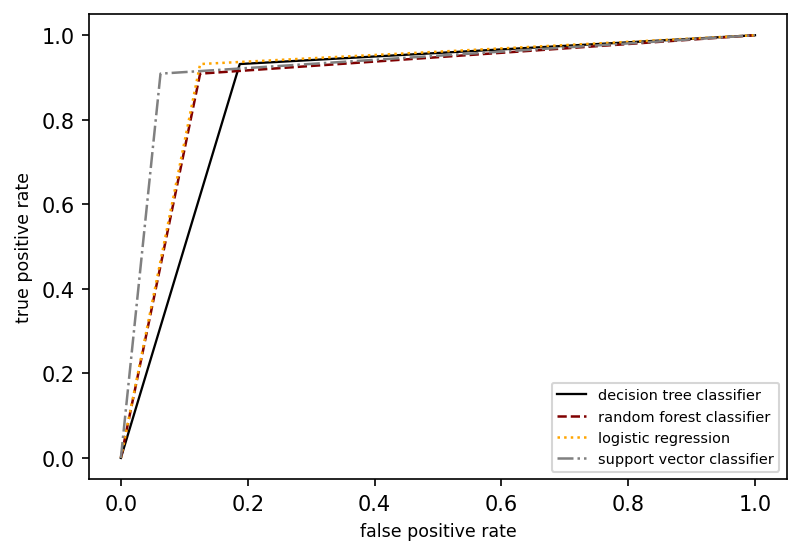

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

'''
calculating probabilities
'''

print("area under curve\n-----------------------------")


dec_tree_prob = decision_tree.predict_proba(X_test)[:,1]
print('dec_tree auc:', np.round(roc_auc_score(y_test, dec_tree_prob), 3))

rf_prob = random_forest.predict_proba(X_test)[:,1]
print('r_forest auc:', np.round(roc_auc_score(y_test, rf_prob), 3))

svm_prob = svm.predict_proba(X_test)[:,1]
print('svm_auc:', np.round(roc_auc_score(y_test, svm_prob), 3))

log_reg_prob = log_reg.predict_proba(X_test)[:,1]
print('log_reg_auc:', np.round(roc_auc_score(y_test, log_reg_prob), 3))

fpr_dec_tree, tpr_dec_tree, threshold_tree = roc_curve(y_test, dec_pred)

fpr_r_forest, tpr_r_forest, threshold_forest = roc_curve(y_test, rf_pred)

fpr_svm, tpr_svm, threshold_svm = roc_curve(y_test, svm_pred)

fpr_log_reg, tpr_log_reg, threshold_log_red = roc_curve(y_test, log_reg_pred)

pl.subplot()

pl.plot(fpr_dec_tree, tpr_dec_tree, c = 'k', linewidth = 1.1, label = "decision tree classifier")
pl.plot(fpr_r_forest, tpr_r_forest, c = 'maroon', ls = '--', linewidth = 1.2, label = 'random forest classifier')
pl.plot(fpr_log_reg, tpr_log_reg, c = 'orange', ls = ':', linewidth = 1.2, label = 'logistic regression')
pl.plot(fpr_svm, tpr_svm, c = 'grey', ls = '-.', linewidth = 1.2, label = 'support vector classifier')
pl.xlabel('false positive rate', fontsize = "small")
pl.ylabel('true positive rate', fontsize = "small")
pl.legend(fontsize="x-small")

pl.subplots_adjust(top = .9, right = .9)
pl.show()

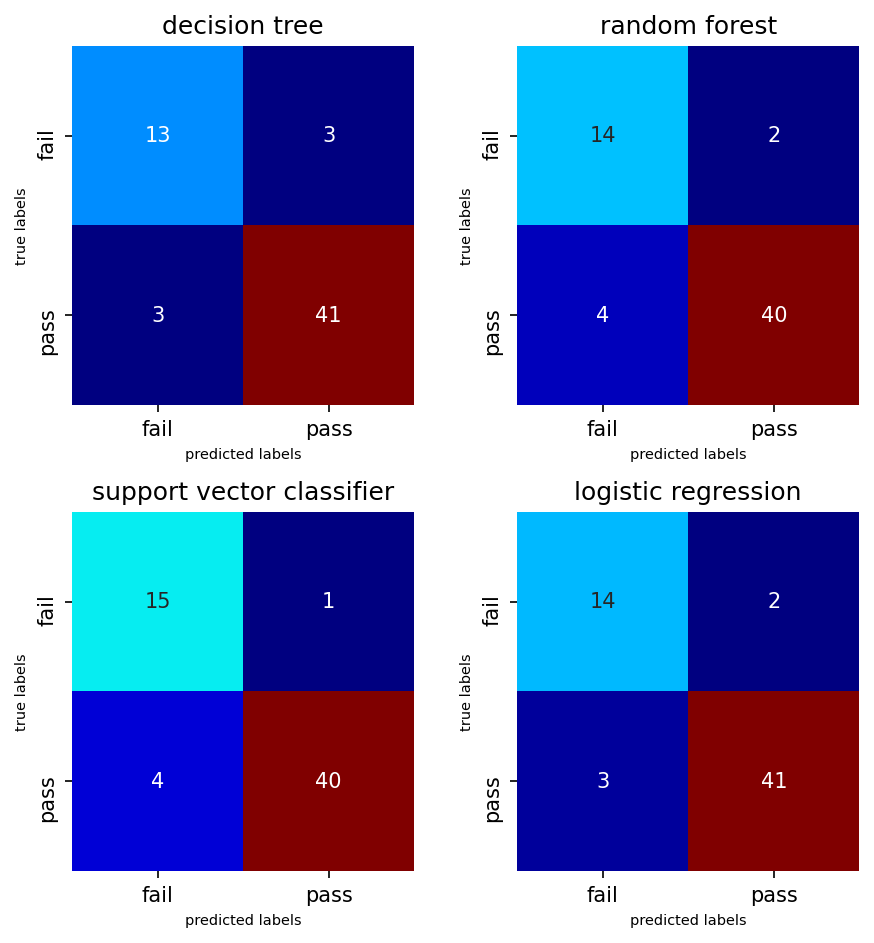

In [22]:
from sklearn.metrics import confusion_matrix

tree_cm = confusion_matrix(y_test, dec_pred)   #decision tree confusion matrix

rf_cm = confusion_matrix(y_test, rf_pred)  #random forest confusion matrix 

svm_cm = confusion_matrix(y_test, svm_pred)

log_reg_cm = confusion_matrix(y_test, log_reg_pred)


confusion_mats = {'decision tree': tree_cm, 'random forest': rf_cm, \
                 'support vector classifier': svm_cm, 'logistic regression': log_reg_cm}

for i in range(len(confusion_mats)):
    pl.subplot(220 + i + 1, title = list(confusion_mats.keys())[i])
    sns.heatmap(confusion_mats[list(confusion_mats.keys())[i]], annot = True, cmap = "jet", cbar = False)
    pl.xlabel('predicted labels', fontsize = 'x-small')
    pl.ylabel('true labels', fontsize = 'x-small')
    pl.xticks([0.5, 1.5], ['fail', 'pass'])
    pl.yticks([0.5, 1.5], ['fail', 'pass'])


pl.subplots_adjust(right = 1., top = 1.5, wspace = .3, hspace = .3)
pl.show()